In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# hide warnings
import warnings
warnings.filterwarnings('ignore')
# importing required libraries

In [2]:
#pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

READING AND UNDERSTANDING THE DATA

In [3]:
df = pd.read_csv('train (1).csv')
df.shape
# there are around 70k rows and 172 columns

(69999, 172)

In [4]:
df.info(verbose=True)
# as you can see there are few objects lets check them

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [5]:
df.select_dtypes(include=['object'])
# as you can see all of them are dates and we have months in the column names and all belong to same year so lets extract the data of day and convert them to int or float

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/30/2014,7/31/2014,8/31/2014,6/22/2014,7/10/2014,8/24/2014,NaN,NaN,NaN
1,6/30/2014,7/31/2014,8/31/2014,6/12/2014,7/10/2014,8/26/2014,NaN,7/8/2014,NaN
2,6/30/2014,7/31/2014,8/31/2014,6/11/2014,7/22/2014,8/24/2014,NaN,NaN,NaN
3,6/30/2014,7/31/2014,8/31/2014,6/15/2014,7/21/2014,8/25/2014,NaN,NaN,NaN
4,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/26/2014,8/30/2014,6/25/2014,7/23/2014,8/20/2014
...,...,...,...,...,...,...,...,...,...
69994,6/30/2014,7/31/2014,8/31/2014,6/18/2014,7/31/2014,8/31/2014,NaN,7/31/2014,8/21/2014
69995,6/30/2014,7/31/2014,8/31/2014,6/28/2014,7/31/2014,8/27/2014,NaN,NaN,NaN
69996,6/30/2014,7/31/2014,8/31/2014,6/25/2014,7/30/2014,8/29/2014,NaN,NaN,NaN
69997,6/30/2014,7/31/2014,8/31/2014,6/29/2014,7/19/2014,8/26/2014,6/17/2014,7/13/2014,8/14/2014


HANDLING MISSING DATA

In [6]:
def count_nulls(df):
    percentage = df.isna().mean()*100
    percentage = pd.DataFrame(percentage)
    percentage['Cols']=df.columns
    percentage.reset_index(drop=True,inplace=True)
    percentage[0] = percentage[0].apply(lambda x: int(x))
    percentage_nulls_70 = percentage[percentage[0]>50]
    l= percentage_nulls_70['Cols'].to_list()
    print(l)
    #the below list has greater than 50% of missing values or nulls 

In [7]:
count_nulls(df)
# these are the data that are having more than 50 percent of null values and there are some minor nulls which we will fix

['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


In [8]:
date = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
df[date] = df[date].apply(lambda x: pd.to_datetime(x,errors = 'coerce', format = '%m/%d/%Y'))
df[date]=df[date].apply(lambda x: x.dt.day)
df[date]= df[date].fillna(0)
# converting date column into day and imputing missing columns with zero

In [9]:
rech = ['arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8','total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8','night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']
for i in rech:
    print(f'{i}-{df[i].value_counts()}')

# As you can see from the value counts all the columns missing values can be imputed with zeroes

arpu_3g_6-0.00      7617
212.17     501
0.01       317
122.07     295
63.96      214
          ... 
40.96        1
376.46       1
151.84       1
882.14       1
80.53        1
Name: arpu_3g_6, Length: 5506, dtype: int64
arpu_3g_7-0.00      7795
212.17     532
0.01       459
122.07     231
63.96      191
          ... 
151.22       1
25.57        1
142.67       1
104.39       1
125.47       1
Name: arpu_3g_7, Length: 5389, dtype: int64
arpu_3g_8-0.00      7852
212.17     510
0.01       460
122.07     211
21.91      189
          ... 
297.60       1
10.15        1
262.29       1
67.15        1
91.89        1
Name: arpu_3g_8, Length: 5816, dtype: int64
arpu_2g_6-0.00      4610
212.17     904
122.07     377
0.01       291
63.96      283
          ... 
138.26       1
23.23        1
80.33        1
31.55        1
279.26       1
Name: arpu_2g_6, Length: 5389, dtype: int64
arpu_2g_7-0.00      5202
212.17     956
0.01       442
122.07     300
63.96      265
          ... 
20.93        1
11.60    

In [10]:
df[rech] = df[rech].fillna(0)

In [11]:
# after going through the data and seeing the missing values I think we can impute every thing with zero 
df = df.fillna(0)

In [12]:
df.isna().mean()
# as you can see there are no missing values

id                          0.0
circle_id                   0.0
loc_og_t2o_mou              0.0
std_og_t2o_mou              0.0
loc_ic_t2o_mou              0.0
last_date_of_month_6        0.0
last_date_of_month_7        0.0
last_date_of_month_8        0.0
arpu_6                      0.0
arpu_7                      0.0
arpu_8                      0.0
onnet_mou_6                 0.0
onnet_mou_7                 0.0
onnet_mou_8                 0.0
offnet_mou_6                0.0
offnet_mou_7                0.0
offnet_mou_8                0.0
roam_ic_mou_6               0.0
roam_ic_mou_7               0.0
roam_ic_mou_8               0.0
roam_og_mou_6               0.0
roam_og_mou_7               0.0
roam_og_mou_8               0.0
loc_og_t2t_mou_6            0.0
loc_og_t2t_mou_7            0.0
loc_og_t2t_mou_8            0.0
loc_og_t2m_mou_6            0.0
loc_og_t2m_mou_7            0.0
loc_og_t2m_mou_8            0.0
loc_og_t2f_mou_6            0.0
loc_og_t2f_mou_7            0.0
loc_og_t

In [13]:
# here we find all the columns that have one value for the entire column and drop them
zeros = []
for i in df.columns:
    if len(df[i].value_counts()) == 1:
        zeros.append(i)
for i in zeros:
    print(f'{i}-{df[i].value_counts()}')
df.drop(columns=zeros,inplace=True)

circle_id-109    69999
Name: circle_id, dtype: int64
loc_og_t2o_mou-0.0    69999
Name: loc_og_t2o_mou, dtype: int64
std_og_t2o_mou-0.0    69999
Name: std_og_t2o_mou, dtype: int64
loc_ic_t2o_mou-0.0    69999
Name: loc_ic_t2o_mou, dtype: int64
last_date_of_month_6-30    69999
Name: last_date_of_month_6, dtype: int64
std_og_t2c_mou_6-0.0    69999
Name: std_og_t2c_mou_6, dtype: int64
std_og_t2c_mou_7-0.0    69999
Name: std_og_t2c_mou_7, dtype: int64
std_og_t2c_mou_8-0.0    69999
Name: std_og_t2c_mou_8, dtype: int64
std_ic_t2o_mou_6-0.0    69999
Name: std_ic_t2o_mou_6, dtype: int64
std_ic_t2o_mou_7-0.0    69999
Name: std_ic_t2o_mou_7, dtype: int64
std_ic_t2o_mou_8-0.0    69999
Name: std_ic_t2o_mou_8, dtype: int64


In [14]:
df.shape
# After prforming above step we are left with 161 columns and 70k rows

(69999, 161)

In [15]:
df.head()

,id,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,31.0,31.0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,22.0,10.0,24.0,65,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1958,0.0,0.0,0.0,0
1,1,31.0,31.0,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,12.0,10.0,26.0,0,0,0,0.0,8.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,145.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,0.0,122.07,0.0,0.0,122.08,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0.0,1.0,0.0,710,0.0,0.0,0.0,0
2,2,31.0,31.0,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94

# EDA

## Univariate analysis

In [16]:
def univariate(var):
    sns.distplot(var)

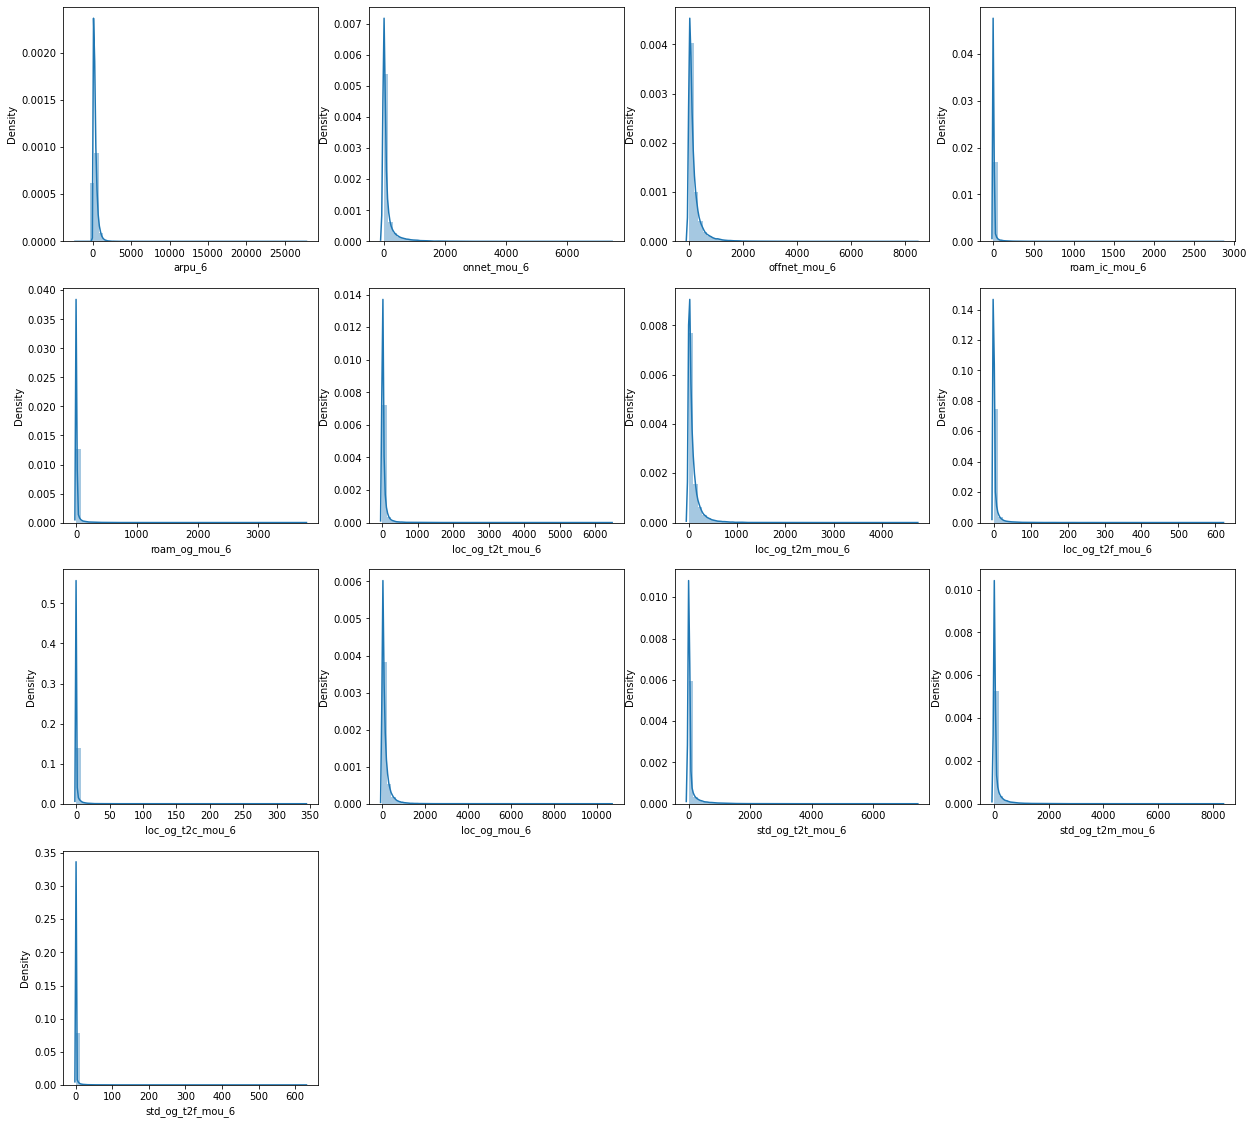

In [17]:
plt.figure(figsize=(21, 25))
plt.subplot(5,4,1)
univariate(df['arpu_6'])
plt.subplot(5,4,2)
univariate(df['onnet_mou_6'])
plt.subplot(5,4,3)
univariate(df['offnet_mou_6'])
plt.subplot(5,4,4)
univariate(df['roam_ic_mou_6'])
plt.subplot(5,4,5)
univariate(df['roam_og_mou_6'])
plt.subplot(5,4,6)
univariate(df['loc_og_t2t_mou_6'])
plt.subplot(5,4,7)
univariate(df['loc_og_t2m_mou_6'])
plt.subplot(5,4,8)
univariate(df['loc_og_t2f_mou_6'])
plt.subplot(5,4,9)
univariate(df['loc_og_t2c_mou_6'])
plt.subplot(5,4,10)
univariate(df['loc_og_mou_6'])
plt.subplot(5,4,11)
univariate(df['std_og_t2t_mou_6'])
plt.subplot(5,4,12)
univariate(df['std_og_t2m_mou_6'])
plt.subplot(5,4,13)
univariate(df['std_og_t2f_mou_6'])
plt.show()
# as you can see all the variables are tilted towards left

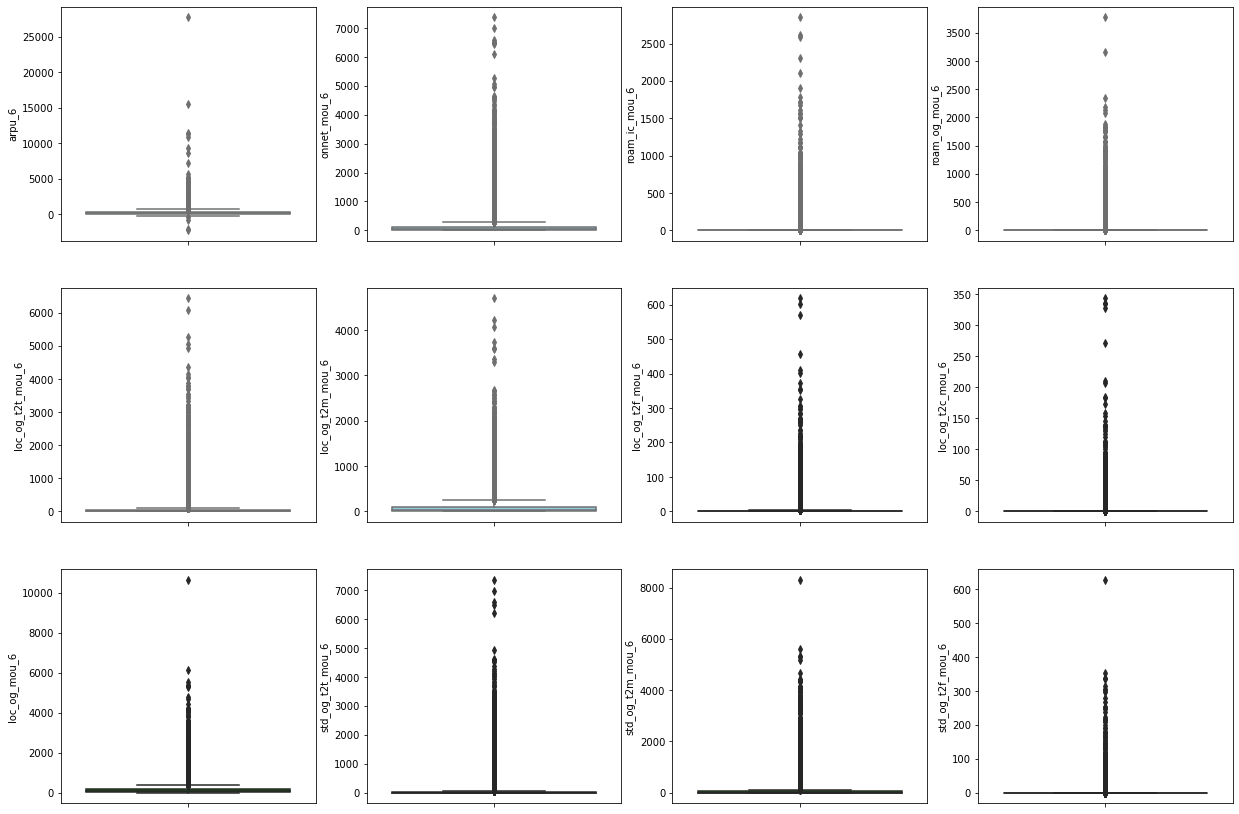

In [18]:
plt.figure(figsize=(21, 25))
plt.subplot(5,4,1)
sns.boxplot(data = df,color='skyblue',y='arpu_6')
plt.subplot(5,4,2)
sns.boxplot(data = df,color='skyblue',y='onnet_mou_6')
plt.subplot(5,4,3)
sns.boxplot(data = df,color='skyblue',y='roam_ic_mou_6')
plt.subplot(5,4,4)
sns.boxplot(data = df,color='skyblue',y='roam_og_mou_6')
plt.subplot(5,4,5)
sns.boxplot(data = df,color='skyblue',y='loc_og_t2t_mou_6')
plt.subplot(5,4,6)
sns.boxplot(data = df,color='skyblue',y='loc_og_t2m_mou_6')
plt.subplot(5,4,7)
sns.boxplot(data = df,color='green',y='loc_og_t2f_mou_6')
plt.subplot(5,4,8)
sns.boxplot(data = df,color='green',y='loc_og_t2c_mou_6')
plt.subplot(5,4,9)
sns.boxplot(data = df,color='green',y='loc_og_mou_6')
plt.subplot(5,4,10)
sns.boxplot(data = df,color='green',y='std_og_t2t_mou_6')
plt.subplot(5,4,11)
sns.boxplot(data = df,color='green',y='std_og_t2m_mou_6')
plt.subplot(5,4,12)
sns.boxplot(data = df,color='green',y='std_og_t2f_mou_6')
plt.show()
#as you can see there are otliers in the data so we will use min max scaler()

## Bivariate Analysis

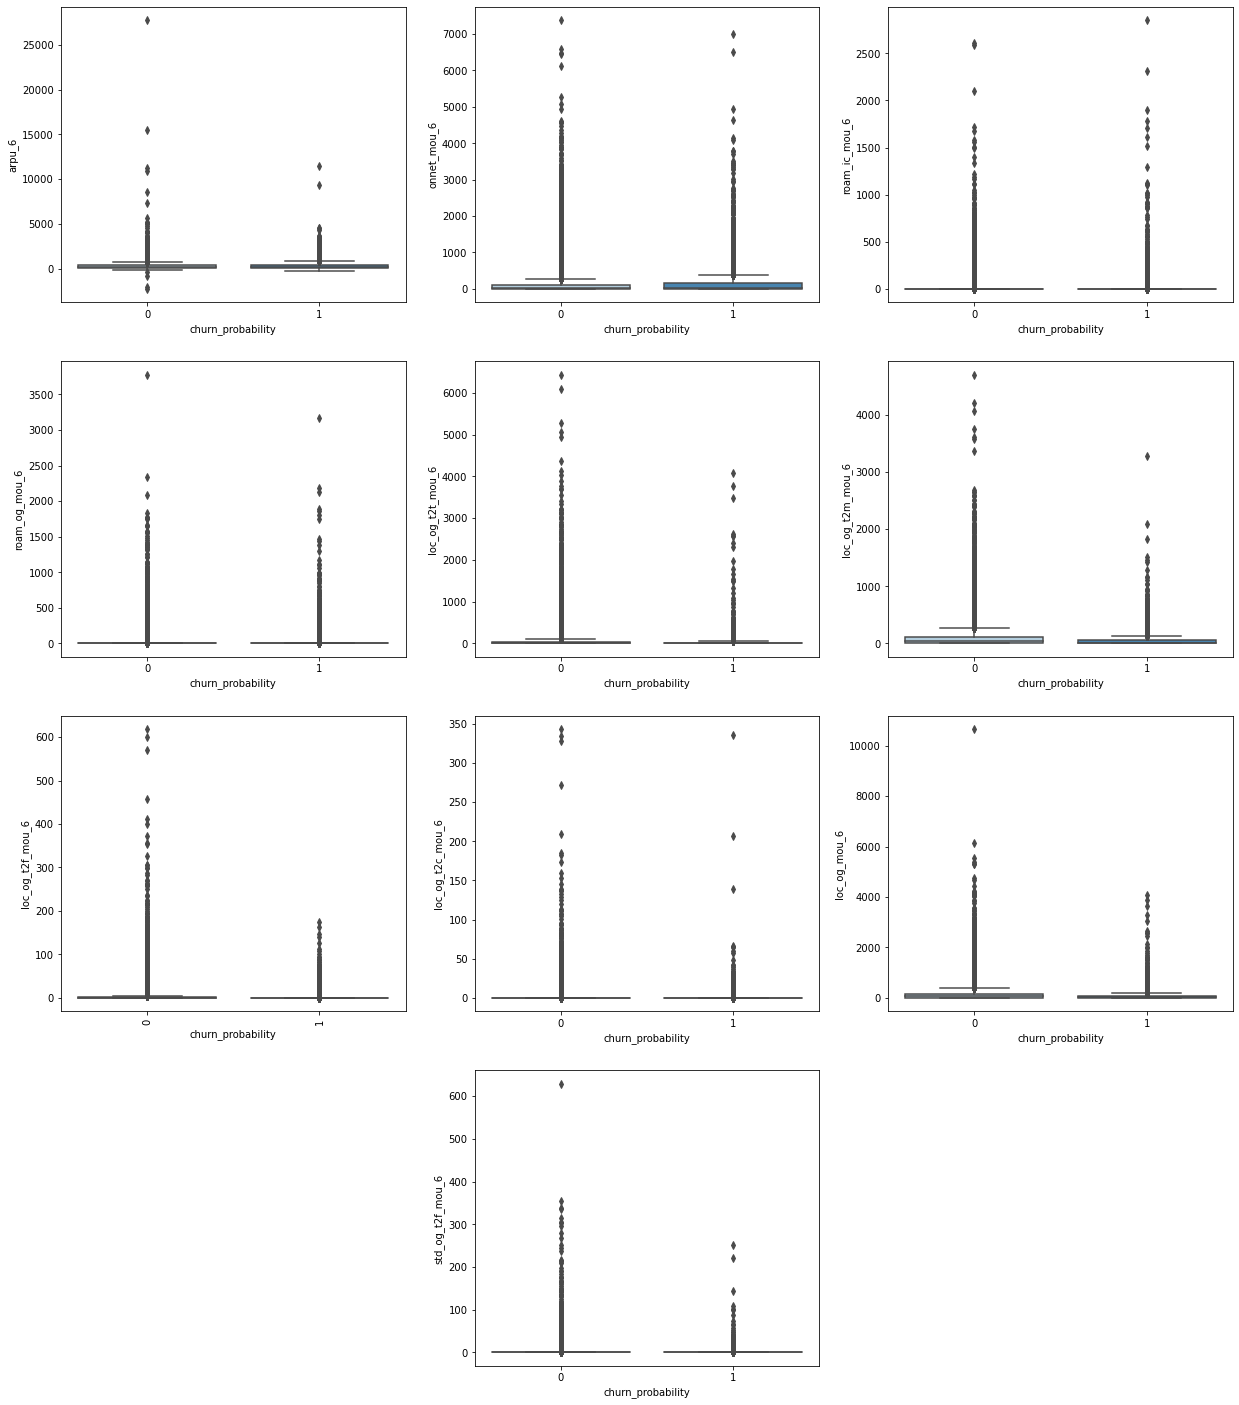

In [20]:
#observation
# here bi variate analysis is done between churn and various other elements
plt.figure(figsize=(21,25))
plt.subplot(4,3,1)
sns.boxplot(data = df,x='churn_probability', y='arpu_6',palette='Blues')
plt.subplot(4,3,2)
sns.boxplot(data = df,x='churn_probability', y='onnet_mou_6',palette='Blues')
plt.subplot(4,3,3)
sns.boxplot(data = df,x='churn_probability', y='roam_ic_mou_6',palette='Blues')
plt.subplot(4,3,4)
sns.boxplot(data = df,x='churn_probability', y='roam_og_mou_6',palette='Blues')
plt.subplot(4,3,5)
sns.boxplot(data = df,x='churn_probability', y='loc_og_t2t_mou_6',palette='Blues')
plt.subplot(4,3,6)
sns.boxplot(data = df,x='churn_probability', y='loc_og_t2m_mou_6',palette='Blues')
plt.subplot(4,3,7)
sns.boxplot(data = df,x='churn_probability', y='loc_og_t2f_mou_6',palette='Blues')
plt.xticks(rotation = 90)
plt.subplot(4,3,8)
sns.boxplot(data = df,x='churn_probability', y='loc_og_t2c_mou_6',palette='Blues')
plt.subplot(4,3,9)
sns.boxplot(data = df,x='churn_probability', y='loc_og_mou_6',palette='Blues')
plt.subplot(4,3,11)
sns.boxplot(data = df,x='churn_probability', y='std_og_t2f_mou_6',palette='Blues')
plt.show()
# there are outliers here so while scaling we will use min max scaler

## Dividing data into test and train

In [21]:
df.rename(columns={'churn_probability':'churn'},inplace=True)

In [22]:
df_model = df
# assigning df to df_model

In [23]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
X = df_model.drop(['churn'], axis=1)
y = df_model['churn']
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100,train_size=0.8)
# splitting data into test and train when it is actually validation and train

### Dealing with imbalance by using SMOTE

In [24]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=100)
X_train, y_train = sm.fit_sample(X_train, y_train)
#using SMOTE to remove imbalance

In [13]:
df.info(verbose=True)
# checking whether all columns are int and float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 161 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    last_date_of_month_7      float64
 2    last_date_of_month_8      float64
 3    arpu_6                    float64
 4    arpu_7                    float64
 5    arpu_8                    float64
 6    onnet_mou_6               float64
 7    onnet_mou_7               float64
 8    onnet_mou_8               float64
 9    offnet_mou_6              float64
 10   offnet_mou_7              float64
 11   offnet_mou_8              float64
 12   roam_ic_mou_6             float64
 13   roam_ic_mou_7             float64
 14   roam_ic_mou_8             float64
 15   roam_og_mou_6             float64
 16   roam_og_mou_7             float64
 17   roam_og_mou_8             float64
 18   loc_og_t2t_mou_6          float64
 19   loc_og_t2t_mou_7          float64
 20   loc_

### Feature scaling

In [25]:
# we are using min max scaler bz there are outliers present in this data and we did not treat them bz we require as much of data we can
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
#features reduction with RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
# Fit a line
lr.fit(X_train, y_train)

LogisticRegression()

In [27]:
#using RFE to find most suitable columns
rfe_m = RFE(lr, n_features_to_select=20)
rfe_m = rfe_m.fit(X_train,y_train)

In [28]:
df_n1=df.drop(columns=['churn'],axis=1)

In [29]:
rfe_features = list(df_n1.columns[rfe_m.support_])
rfe_features
#getting most important features

['last_date_of_month_8',
 'arpu_6',
 'arpu_7',
 'roam_og_mou_8',
 'loc_og_t2m_mou_8',
 'loc_og_mou_8',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_8',
 'total_ic_mou_8',
 'spl_ic_mou_8',
 'total_rech_num_8',
 'total_rech_amt_6',
 'last_day_rch_amt_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'monthly_2g_8',
 'sachet_2g_6',
 'sachet_2g_8',
 'monthly_3g_8']

In [30]:
#select the columns which are identified by RFE for LR model building
rfe_X_train = pd.DataFrame(data= X_train).iloc[:,rfe_m.support_]
rfe_y_train = y_train

In [31]:
lr_model = LogisticRegression(random_state=1)
lr_model.fit(rfe_X_train,rfe_y_train)
# Lets predict using Logistic Regression model
X_test_rfe = pd.DataFrame(data= X_test).iloc[:,rfe_m.support_]
y_pred = lr_model.predict(X_test_rfe)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))
# getting the important scores

              precision    recall  f1-score   support

           0       0.98      0.80      0.88     12608
           1       0.31      0.83      0.45      1392

    accuracy                           0.80     14000
   macro avg       0.64      0.81      0.67     14000
weighted avg       0.91      0.80      0.84     14000



In [33]:
from sklearn.metrics import confusion_matrix

con_matrix = confusion_matrix(y_test,y_pred)
print(con_matrix)
# printing confusion matrix

[[10076  2532]
 [  241  1151]]


In [34]:
print('Accuracy:',lr_model.score(X_test_rfe,y_test)*100,"%")

Accuracy: 80.19285714285715 %


## PCA

In [35]:
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
# importing PCA and setting random state


In [36]:
pca.fit(X_train)
# fitting pca on xtrain

PCA(random_state=42)

In [37]:
pca.components_

array([[ 6.28041235e-03,  3.23213580e-02,  4.42704105e-02, ...,
         1.46078858e-02,  1.44700710e-02,  1.05236459e-02],
       [ 7.39102036e-03, -2.33807621e-01, -3.64455943e-01, ...,
         1.67947163e-04,  2.60206204e-03,  4.82879614e-03],
       [-2.57945586e-03, -1.07863325e-01, -1.02451859e-01, ...,
         1.04366053e-02,  2.67938487e-03, -3.83370132e-03],
       ...,
       [ 0.00000000e+00,  1.51857746e-17, -5.92747418e-18, ...,
         1.06950802e-18,  7.13221679e-17, -3.20094601e-17],
       [ 0.00000000e+00, -5.94615581e-18,  1.13904342e-17, ...,
        -3.26579501e-17,  1.03882675e-16, -4.51078263e-17],
       [ 0.00000000e+00, -3.69101167e-18, -6.49342918e-18, ...,
        -2.78889001e-15, -5.02355346e-16,  4.80238311e-15]])

In [38]:
Cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(Cumulative_variance)

[0.39302382 0.52279203 0.60167997 0.67619958 0.73594852 0.77710811
 0.81740874 0.84919342 0.87296584 0.89185021 0.90491224 0.91621367
 0.92608329 0.93343787 0.94027353 0.94628393 0.9514112  0.95584121
 0.95975076 0.96304498 0.96576412 0.96813489 0.97032396 0.97224479
 0.97407393 0.97558695 0.97680267 0.97800259 0.97915797 0.98017988
 0.98112773 0.98202535 0.9828761  0.98371533 0.9845097  0.98528155
 0.98602985 0.98672249 0.98737149 0.98798    0.98853782 0.98908274
 0.98960879 0.99010381 0.99059406 0.99104404 0.99147358 0.99188941
 0.99228572 0.99266957 0.9930171  0.99333044 0.99363048 0.99390883
 0.99417874 0.99444156 0.99469197 0.99492749 0.99515742 0.99538369
 0.99560312 0.99580045 0.99599252 0.99618271 0.99635656 0.99652606
 0.99668953 0.99685013 0.99700088 0.99714412 0.99727362 0.99740239
 0.99752657 0.99764674 0.99776182 0.99787045 0.9979757  0.99807655
 0.99817322 0.99825985 0.99834362 0.99842667 0.998507   0.99858605
 0.99866251 0.99873801 0.99880711 0.9988709  0.99893431 0.9989

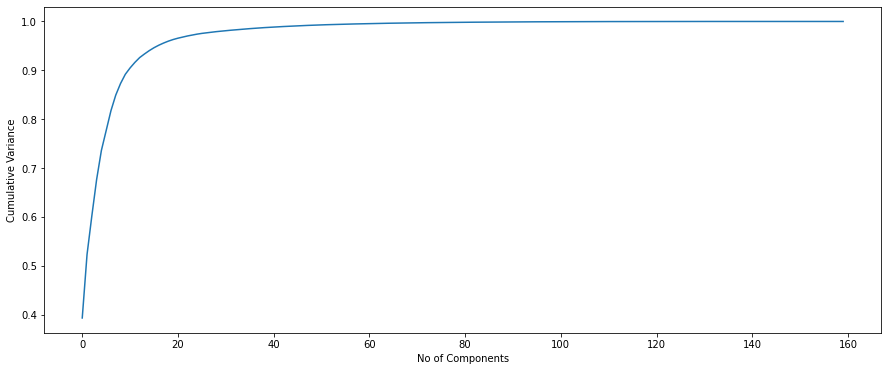

In [39]:
# Plotting scree plot
fig = plt.figure(figsize = (15,6))
plt.plot(Cumulative_variance)
plt.xlabel('No of Components')
plt.ylabel('Cumulative Variance')
plt.show()
# here we can see that around 20 variables explains most of the data

In [40]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=20)
X_train_pca = pca_final.fit_transform(X_train)
X_test_pca = pca_final.transform(X_test)

# Logistic regression with PCA

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [42]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

params = {'C': [0.01, 0.1, 1,5, 10,50, 100,500,1000]}
lr = LogisticRegression()
# giving score as recall because we want more sensitivity than accuracy
model_cv = GridSearchCV(estimator = lr,
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 


model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 5, 10, 50, 100, 500, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [43]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'C': 100}


In [44]:
lr_cv_results = pd.DataFrame(model_cv.cv_results_)
lr_cv_results = lr_cv_results[lr_cv_results['param_C']<=100]
lr_cv_results
# just glancing over the results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.311856,0.093835,0.009845,0.003520,0.01,{'C': 0.01},0.780456,0.780287,0.786121,0.781281,0.783905,0.782410,0.002263,9,0.782525,0.782815,0.786698,0.778778,0.781858,0.782535,0.002529
1,0.432163,0.052938,0.009873,0.001367,0.1,{'C': 0.1},0.800316,0.804160,0.807591,0.803448,0.809041,0.804911,0.003100,8,0.805247,0.804925,0.807301,0.802987,0.803553,0.804803,0.001504
2,0.711077,0.028268,0.008029,0.000953,1,{'C': 1},0.803577,0.810203,0.809626,0.807389,0.812519,0.808663,0.003022,7,0.809233,0.808361,0.810764,0.807350,0.807359,0.808613,0.001284
3,0.838146,0.015448,0.009941,0.001957,5,{'C': 5},0.803280,0.810698,0.810236,0.806897,0.812419,0.808706,0.003250,6,0.809632,0.808236,0.810962,0.807699,0.807558,0.808817,0.001299
4,0.843748,0.045270,0.008823,0.001967,10,{'C': 10},0.803972,0.810401,0.810745,0.806995,0.812817,0.808986,0.003126,4,0.809607,0.808535,0.810888,0.807973,0.807185,0.808838,0.001293
5,0.880387,0.085845,0.008532,0.001206,50,{'C': 50},0.803676,0.810500,0.810745,0.806995,0.813015,0.808986,0.003280,3,0.809856,0.808859,0.810987,0.808023,0.807509,0.809047,0.001254
6,0.880584,0.064577,0.009444,0.001910,100,{'C': 100},0.803577,0.810302,0.811559,0.806995,0.813214,0.809129,0.003445,1,0.810280,0.808859,0.811160,0.808173,0.807782,0.809251,0.001279


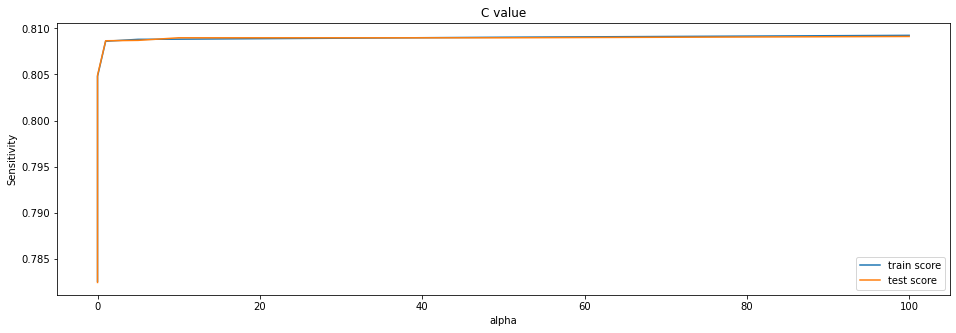

In [45]:
# plotting mean test and train scoes with alpha 
lr_cv_results['param_C'] = lr_cv_results['param_C'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(lr_cv_results['param_C'], lr_cv_results['mean_train_score'])
plt.plot(lr_cv_results['param_C'], lr_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Sensitivity')
plt.title("C value")
plt.legend(['train score', 'test score'], loc='lower right')
plt.show()

In [46]:
k =model_cv.best_params_['C']
print(f'Sensitivity of the model is {model_cv.best_score_} with the C value of {k}')

Sensitivity of the model is 0.8091293690363088 with the C value of 100


In [47]:
lr_pca = LogisticRegression(C=k)
log_pca_model = lr_pca.fit(X_train_pca, y_train)

In [51]:
y_pred_pca = log_pca_model.predict(X_test_rfe)
print('Accuracy:',log_pca_model.score(X_test_rfe,y_test)*100,"%")
# As you can see there is a 10% increase in the accuracy


Accuracy: 90.99285714285715 %


In [50]:
con_matrix = confusion_matrix(y_test,y_pred_pca)
print(con_matrix)
# printing confusion matrix

[[12606     2]
 [ 1259   133]]


# Decision tree with PCA

In [52]:
from sklearn.tree import DecisionTreeClassifier

# Creating the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiating the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fitting the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [53]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.267591,0.052777,0.014292,0.008654,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.688818,0.731994,0.723538,0.747811,0.716446,0.721721,0.019493,7
1,1.299330,0.049485,0.008497,0.000749,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.688818,0.731994,0.723538,0.747811,0.716446,0.721721,0.019493,7
2,1.199930,0.027779,0.008623,0.000519,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.687425,0.733983,0.723836,0.746916,0.716546,0.721741,0.019963,5
3,1.379258,0.145855,0.009695,0.001508,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.687425,0.733983,0.723836,0.746916,0.716546,0.721741,0.019963,5
4,2.220748,0.198668,0.012360,0.003371,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.766514,0.825806,0.822722,0.829387,0.818327,0.812551,0.023304,1
5,3.214217,0.634393,0.013524,0.002859,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.766017,0.825806,0.822722,0.829387,0.817929,0.812372,0.023481,2
6,2.337690,0.492862,0.010778,0.000973,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.759948,0.817947,0.813868,0.803223,0.816834,0.802364,0.021837,3
7,1.924164,0.163025,0.010638,0.000689,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.759948,0.817947,0.813868,0.803223,0.816834,0.802364,0.021837,3


In [54]:
# Printing sensitivity score and hyperparameters
print("sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

sensitivity:- 0.8125511008064997
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [56]:
# Model with optimal hyperparameters
decisiontree_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

decisiontree_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [57]:
# Predictions on the train set
y_train_pred = decisiontree_pca_model.predict(X_train_pca)
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[40837  9422]
 [ 7920 42339]]


In [58]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [60]:
# Accuracy
print("Accuracy - ",metrics.accuracy_score(y_train, y_train_pred))
# Sensitivity
print("Sensitivity - ",TP / float(TP+FN))
# Specificity
print("Specificity - ", TN / float(TN+FP))

Accuracy -  0.8274736863049404
Sensitivity -  0.8424162836506894
Specificity -  0.8125310889591913


In [61]:
# Prediction on the test set
y_test_pred = decisiontree_pca_model.predict(X_test_pca)
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[10140  2468]
 [  448   944]]


In [62]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [63]:
# Accuracy
print("Accuracy - ",metrics.accuracy_score(y_test, y_test_pred))
# Sensitivity
print("Sensitivity - ",TP / float(TP+FN))
# Specificity
print("Specificity - ", TN / float(TN+FP))

Accuracy -  0.7917142857142857
Sensitivity -  0.6781609195402298
Specificity -  0.804251269035533


### Prediction on Train set

In [71]:
y_pred_train = log_pca_model.predict(X_train_pca)
confusion = metrics.confusion_matrix(y_train, y_pred_train)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print("accuracy:-",metrics.accuracy_score(y_train, y_pred_train))
print("sensitivity:-",TP / float(TP+FN))
print("specificity:-", TN / float(TN+FP))

accuracy:- 0.7995582880678087
sensitivity:- 0.8093276826041107
specificity:- 0.7897888935315068


In [72]:
y_train_sm_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_pred_train})
y_train_sm_pred_final.head()

,Converted,Converted_prob
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0


In [73]:
y_train_sm_pred_final['churn_pred'] = y_train_sm_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Converted,Converted_prob,churn_pred
0,1,1,1
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [74]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred )
print(confusion)

[[39694 10565]
 [ 9583 40676]]


In [75]:
# Checking the overall accuracy.
print("The overall accuracy of the model is:",metrics.accuracy_score(y_train_sm_pred_final.Converted, y_train_sm_pred_final.churn_pred))

The overall accuracy of the model is: 0.7995582880678087


# PREDICTING ON TEST DATA

In [64]:
df_test = pd.read_csv('test (1).csv')
k = df_test['id']

In [65]:
date = ['date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
df_test[date] = df_test[date].apply(lambda x: pd.to_datetime(x,errors = 'coerce', format = '%m/%d/%Y'))
df_test[date]=df_test[date].apply(lambda x: x.dt.day)
df_test[date]= df_test[date].fillna(0)
# converting date column into day and imputing missing columns with zero

In [66]:
df_test = df_test.fillna(0)

In [67]:
# here we find all the columns that have one value for the entire column and drop them
zero = []
for i in df_test.columns:
    if len(df_test[i].value_counts()) == 1:
        zero.append(i)
for i in zero:
    print(f'{i}-{df_test[i].value_counts()}')
df_test.drop(columns=zero,inplace=True)

circle_id-109    30000
Name: circle_id, dtype: int64
loc_og_t2o_mou-0.0    30000
Name: loc_og_t2o_mou, dtype: int64
std_og_t2o_mou-0.0    30000
Name: std_og_t2o_mou, dtype: int64
loc_ic_t2o_mou-0.0    30000
Name: loc_ic_t2o_mou, dtype: int64
last_date_of_month_6-30    30000
Name: last_date_of_month_6, dtype: int64
std_og_t2c_mou_6-0.0    30000
Name: std_og_t2c_mou_6, dtype: int64
std_og_t2c_mou_7-0.0    30000
Name: std_og_t2c_mou_7, dtype: int64
std_og_t2c_mou_8-0.0    30000
Name: std_og_t2c_mou_8, dtype: int64
std_ic_t2o_mou_6-0.0    30000
Name: std_ic_t2o_mou_6, dtype: int64
std_ic_t2o_mou_7-0.0    30000
Name: std_ic_t2o_mou_7, dtype: int64
std_ic_t2o_mou_8-0.0    30000
Name: std_ic_t2o_mou_8, dtype: int64


In [68]:
df_test.shape

(30000, 160)

In [69]:
dff = df_model.drop(columns=['churn'])
k1=dff.columns
# dropping churn and assigning it to dff

In [70]:
df_test_scal = df_test
# creating a df named df_test_scal for usage

In [71]:
# Scaling the test data
df_test_scal[k1] = scaler.transform(df_test_scal[k1])
df_test_scal = pd.DataFrame(df_test_scal)

In [72]:
# Feature selection
df_test_scal=df_test_scal[rfe_features]
df_test_scal.head()

,last_date_of_month_8,arpu_6,arpu_7,roam_og_mou_8,loc_og_t2m_mou_8,loc_og_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,loc_ic_mou_8,total_ic_mou_8,spl_ic_mou_8,total_rech_num_8,total_rech_amt_6,last_day_rch_amt_8,count_rech_2g_6,count_rech_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_8,monthly_3g_8
0,1.0,0.078380,0.037190,0.0000,0.001685,0.002666,0.001519,0.000000,0.002909,0.003348,0.023132,0.031496,0.002927,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.089126,0.049547,0.0000,0.076040,0.035970,0.029456,0.000000,0.017306,0.026006,0.000000,0.039370,0.014209,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.086314,0.047333,0.0102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.039370,0.014209,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.076768,0.040101,0.0000,0.004134,0.002071,0.080798,0.000978,0.049089,0.050703,0.000000,0.015748,0.003126,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.085548,0.046548,0.0000,0.002205,0.002311,0.001226,0.000000,0.001626,0.014705,0.000000,0.062992,0.010117,0.038247,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
y_test_pred = log_pca_model.predict(df_test_scal)
#predicting on test set

In [75]:
y_pred = pd.DataFrame(y_test_pred)
y_pred=y_pred.rename(columns = {0:"Conversion_probability"})
y_pred.head()
# converting them in to df and renaming columns

,Conversion_probability
0,0
1,0
2,0
3,0
4,0


In [76]:
y_pred_final = pd.concat([k,y_pred],axis=1)
y_pred_final.head()
#concating them for proability prediction

,id,Conversion_probability
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [78]:
y_pred_final['test_churn_pred'] = y_pred_final.Conversion_probability.map(lambda x: 1 if x>0.54 else 0)
y_pred_final.head()
# predicting churn based on probability and dropping conversion probab column

,id,Conversion_probability,test_churn_pred
0,69999,0,0
1,70000,0,0
2,70001,0,0
3,70002,0,0
4,70003,0,0


In [79]:
y_pred_final.drop(columns=['Conversion_probability'],axis=1,inplace=True)
y_pred_final.head()

,id,test_churn_pred
0,69999,0
1,70000,0
2,70001,0
3,70002,0
4,70003,0


In [80]:
y_pred_final.to_csv("final_pred_output.csv")

### These are the 20 most important features that affect telcom churn
last_date_of_month_8, <br />
arpu_6,<br />
arpu_7,<br />
roam_og_mou_8,<br />
loc_og_t2m_mou_8,<br />
loc_og_mou_8,<br />
loc_ic_t2m_mou_8,<br />
loc_ic_t2f_mou_8,<br />
loc_ic_mou_8,<br />
total_ic_mou_8,<br />
spl_ic_mou_8,<br />
total_rech_num_8,<br />
total_rech_amt_6,<br />
last_day_rch_amt_8,<br />
count_rech_2g_6,<br />
count_rech_2g_7,<br />
monthly_2g_8,<br />
sachet_2g_6,<br />
sachet_2g_8,<br />
monthly_3g_8

** total recharge on first and last month affect churn <br />
** all selected variables on the 8th month tend to affect churn <br />
** users who have absolutely no usage of anything like calls,recharge,3g or 2g data anything will most probably churn 